In [2]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

import os
import json
from zipfile import ZipFile
from PIL import Image


In [3]:
with ZipFile("C:\Users\Sai Darshini\OneDrive\Desktop\DDD\test_ds", 'r') as zip_ref:
    zip_ref.extractall()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2106859355.py, line 1)

In [4]:
img_array = cv2.imread("C:/Users/Sai Darshini/OneDrive/Desktop/DDD/test_ds/close_eyes/s0002_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

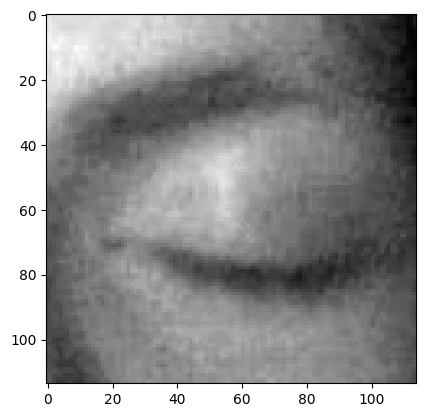

In [5]:
plt.imshow(img_array,cmap="gray")

In [6]:
img_array.shape

(114, 114)

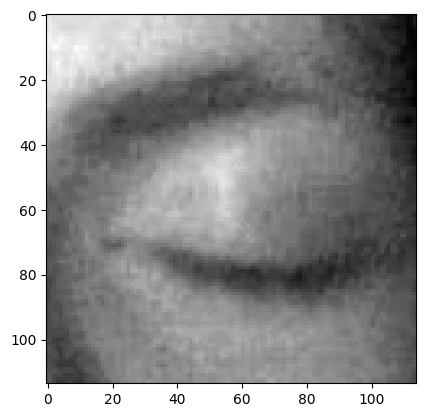

In [7]:
Datadirectory = "C:/Users/Sai Darshini/OneDrive/Desktop/DDD/test_ds"
Classes = ["close_eyes","open_eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

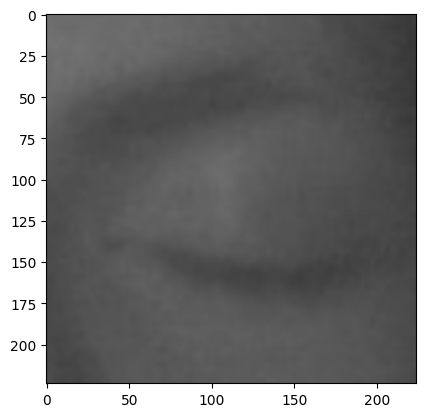

In [8]:
img_size= 224

new_array= cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show

In [9]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_Data()

In [11]:
print(len(training_Data))

2378


In [12]:
import random

random.shuffle(training_Data)

In [13]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [14]:
X.shape

(2378, 224, 224, 3)

In [15]:
X = X/255.0;

In [16]:
Y = np.array(y)

In [17]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.mobilenet.MobileNet()

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'


In [21]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [22]:
base_input = model.layers[0].input

In [23]:
input_layer = model.input

In [24]:
base_output = model.layers[-4].output

In [25]:
Flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [26]:
new_model = keras.Model(inputs = input_layer, outputs= final_output)

In [27]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [28]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [29]:
new_model.fit(X,Y, epochs = 1,validation_split=0.1)

67/67 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.9351 - loss: 0.1412 - val_accuracy: 0.6176 - val_loss: 1.4544


In [30]:
new_model.save('my_model.h5')


In [31]:
new_model = tf.keras.models.load_model('my_model.h5')

In [32]:
import cv2

# Print the current working directory to check if the file is in the expected location
import os
print(os.getcwd())

# Verify that the image file exists
if os.path.exists('C:/Users/Sai Darshini/OneDrive/Desktop/DDD/test_ds/close_eyes/s0002_00006_0_0_0_0_0_01.png'):
    print("File exists")
else:
    print("File not found! Please check the file path.")

# Try loading the image using the absolute path
img_array = cv2.imread('C:/Users/Sai Darshini/OneDrive/Desktop/DDD/test_ds/close_eyes/s0002_00006_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

# If img_array is still None, the file might be corrupted or not a valid image
if img_array is None:
    print("Error loading image! Please ensure the file is a valid image.")
else:
    backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
    new_array = cv2.resize(backtorgb, (img_size, img_size))

c:\Users\Sai Darshini\Downloads
File exists


In [33]:
img_array = cv2.imread('C:/Users/Sai Darshini/OneDrive/Desktop/DDD/test_ds/close_eyes/s0002_00006_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))


In [35]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [36]:
X_input.shape

(1, 224, 224, 3)

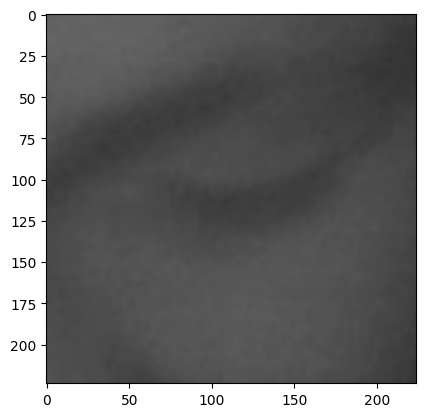

In [37]:
plt.imshow(new_array)


In [38]:
X_input=X_input/255.0

In [40]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [41]:
prediction

array([[0.99110365]], dtype=float32)

In [42]:
import cv2
import matplotlib.pyplot as plt

# Make sure the image path is correct and the image file exists
img_path = 'C:/Users/Sai Darshini/OneDrive/Desktop/DDD/test_ds/close_eyes/s0002_00895_0_0_0_0_0_01.png'
img = cv2.imread(img_path)


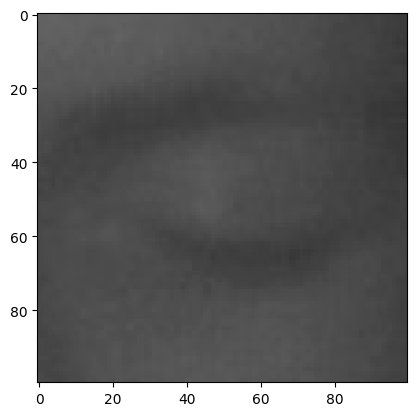

In [43]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [44]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'C:/Users/Sai Darshini/OneDrive/Desktop/DDD/haarcascade_eye.xml')

In [45]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'C:/Users/Sai Darshini/OneDrive/Desktop/DDD/haarcascade_eye.xml')

In [46]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [47]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [48]:
import os
import cv2
import matplotlib.pyplot as plt

# Check if the classifier file exists
haarcascade_path = os.path.join(cv2.data.haarcascades, 'haarcascade_eye.xml')
# Print the file path to verify
print(haarcascade_path)
# Check if the file is readable
if not os.access(haarcascade_path, os.R_OK):
    raise FileNotFoundError(f"Error: The haarcascade file '{haarcascade_path}' is not readable.")

# Load the eye cascade classifier
eye_cascade = cv2.CascadeClassifier(haarcascade_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect eyes in the image
# Adjust parameters if needed (scaleFactor, minNeighbors)
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)


c:\Users\Sai Darshini\AppData\Local\Programs\Python\Python311\Lib\site-packages\cv2\data\haarcascade_eye.xml


In [49]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [50]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

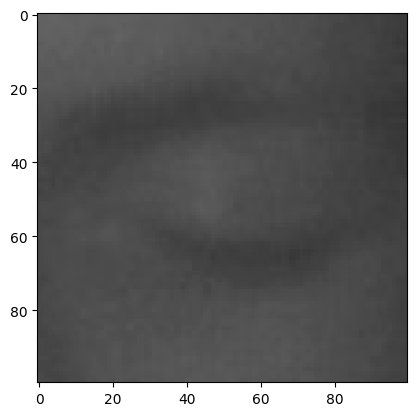

In [51]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [52]:
import os
import cv2
import matplotlib.pyplot as plt

# Check if the classifier file exists
haarcascade_path = os.path.join(cv2.data.haarcascades, 'haarcascade_eye.xml')
# Print the file path to verify
print(haarcascade_path)
# Check if the file is readable
if not os.access(haarcascade_path, os.R_OK):
    raise FileNotFoundError(f"Error: The haarcascade file '{haarcascade_path}' is not readable.")

# Load the eye cascade classifier
eye_cascade = cv2.CascadeClassifier(haarcascade_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect eyes in the image
# Adjust parameters if needed (scaleFactor, minNeighbors)
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)


c:\Users\Sai Darshini\AppData\Local\Programs\Python\Python311\Lib\site-packages\cv2\data\haarcascade_eye.xml


In [54]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ry,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

In [62]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [63]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotAllowedError: Permission denied


In [69]:


import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex +ew]
    final_image =cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0)
    final_image=final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
               status,
               (50, 50),
               font, 3,
               (0, 0, 255),
               2,
               cv2.LINE_4)
    cv2.imshow("Drowsiness Detection Tutorial",frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



KeyboardInterrupt: 

In [61]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'C:/Users/Sai Darshini/OneDrive/Desktop/DDD/haarcascade_eye_tree_eyeglasses.xml')

In [70]:
import winsound
frequency = 2500
duration = 1000
import numpy as np
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_frontalface_default.xml')
faceCascade = cv2.CascadeClassifier('path/to/haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")


counter = 0
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye_tree_eyeglasses.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX

    final_image =cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0)
    final_image=final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Open Eyes"
        cv2.putText(frame,
               status,
               (150, 150),
               font, 3,
               (0, 255, 0),
               2,
               cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
    else:
        counter = counter + 1
        status ="Closed Eyes"
        cv2.putText(frame,
                   status,
                   (150, 150),
                   font, 3,
                   (0, 0, 255),
                   2,
                   cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        if counter>5:
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            cv2.putText(frame, 'Sleep Alert !!', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            winsound.Beep(frequency, duration)
            counter = 0




    cv2.imshow('Drowsiness Detection Tutorial',frame)

    if cv2.waitkey(2) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

True


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [72]:
import winsound
import numpy as np
import cv2

frequency = 2500
duration = 1000

# Load Haar cascades
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

counter = 0
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect eyes
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    eyes_roi = np.zeros((1, 1, 3), dtype=np.uint8)  # Initialize eyes_roi

    for x, y, w, h in eyes:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]

    # Detect faces
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Process eyes_roi
    if eyes_roi.size > 0:
        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0) / 255.0

        Predictions = new_model.predict(final_image)
        if Predictions > 0:
            status = "Open Eyes"
            cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_4)
            x1, y1, w1, h1 = 0, 0, 175, 75
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
            cv2.putText(frame, 'Active', (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        else:
            counter += 1
            status = "Closed Eyes"
            cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2, cv2.LINE_4)
            if counter > 5:
                x1, y1, w1, h1 = 0, 0, 175, 75
                cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
                cv2.putText(frame, 'Sleep Alert !!', (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                winsound.Beep(frequency, duration)
                counter = 0

    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Eyes are not

KeyboardInterrupt: 

In [76]:
import winsound
import numpy as np
import cv2

frequency = 2500
duration = 1000

# Load Haar cascades
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

counter = 0
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect eyes
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    eyes_roi = None  # Initialize eyes_roi to None

    for x, y, w, h in eyes:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]
                break  # Exit after finding the first detected eye region

    # Detect faces
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    if eyes_roi is not None:  # Check if eyes_roi has been set
        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0) / 255.0

        Predictions = new_model.predict(final_image)
        if Predictions[0] > 0.5:  # Adjust this threshold based on your model's output
            status = "Open Eyes"
            counter = 0  # Reset counter if eyes are open
            cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_4)
            x1, y1, w1, h1 = 0, 0, 175, 75
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
            cv2.putText(frame, 'Active', (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        else:
            counter += 1
            status = "Closed Eyes"
            cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2, cv2.LINE_4)
            if counter > 5:
                x1, y1, w1, h1 = 0, 0, 175, 75
                cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
                cv2.putText(frame, 'Sleep Alert !!', (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                winsound.Beep(frequency, duration)
                counter = 0
    else:
        status = "No Eyes Detected"
        cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 2, cv2.LINE_4)

    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

In [75]:
import winsound
import numpy as np
import cv2

frequency = 2500
duration = 1000

# Load Haar cascades
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

counter = 0
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    eyes_roi = None  # Initialize eyes_roi to None
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
        if len(eyes) > 0:
            for (ex, ey, ew, eh) in eyes:
                eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]  # Get the eye region
                cv2.rectangle(frame, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (0, 255, 0), 2)
                break  # Process the first detected eye only

    # Check for predictions if eyes_roi is set
    if eyes_roi is not None:
        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0) / 255.0

        Predictions = new_model.predict(final_image)
        
        # Adjust the threshold based on your model's output
        if Predictions[0] > 0.5:  # Assuming >0.5 means eyes are open
            status = "Open Eyes"
            counter = 0  # Reset counter if eyes are open
        else:
            counter += 1
            status = "Closed Eyes"
            if counter > 5:  # Alert if closed eyes are detected for a certain number of frames
                x1, y1, w1, h1 = 0, 0, 175, 75
                cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
                cv2.putText(frame, 'Sleep Alert !!', (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                winsound.Beep(frequency, duration)
    

    cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Try different camera indices
for camera_index in range(5):  # Check cameras 0 to 4
    cap = cv2.VideoCapture(camera_index)
    if cap.isOpened():
        break
else:
    raise IOError("Cannot open webcam. Please check camera connection and permissions.")

# Rest of the code remains the same...


OSError: Cannot open webcam. Please check camera connection and permissions.